Name:Meghashyam Shenoy
Batch:B4
Section:IV Sem B section
Reg no:220968352

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Dataset:  iris

In [116]:
df=pd.read_csv("Iris.csv")

In [117]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


3)Drop redundant columns

In [118]:
df.drop(['Id'],axis=1,inplace=True)

In [119]:
print(df['Species'].unique())


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [120]:
mapp={'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2
}
df['Species']=df['Species'].map(mapp)

In [121]:
df['Species'] = df['Species'].astype(float)


In [122]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

4 and 5) View the summary of the dataset

In [123]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


7. Check data types of columns of data frame

In [125]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species          float64
dtype: object

8. Identify Missing values, NAN in variables

In [126]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

9. Check the distribution of variables using histograms

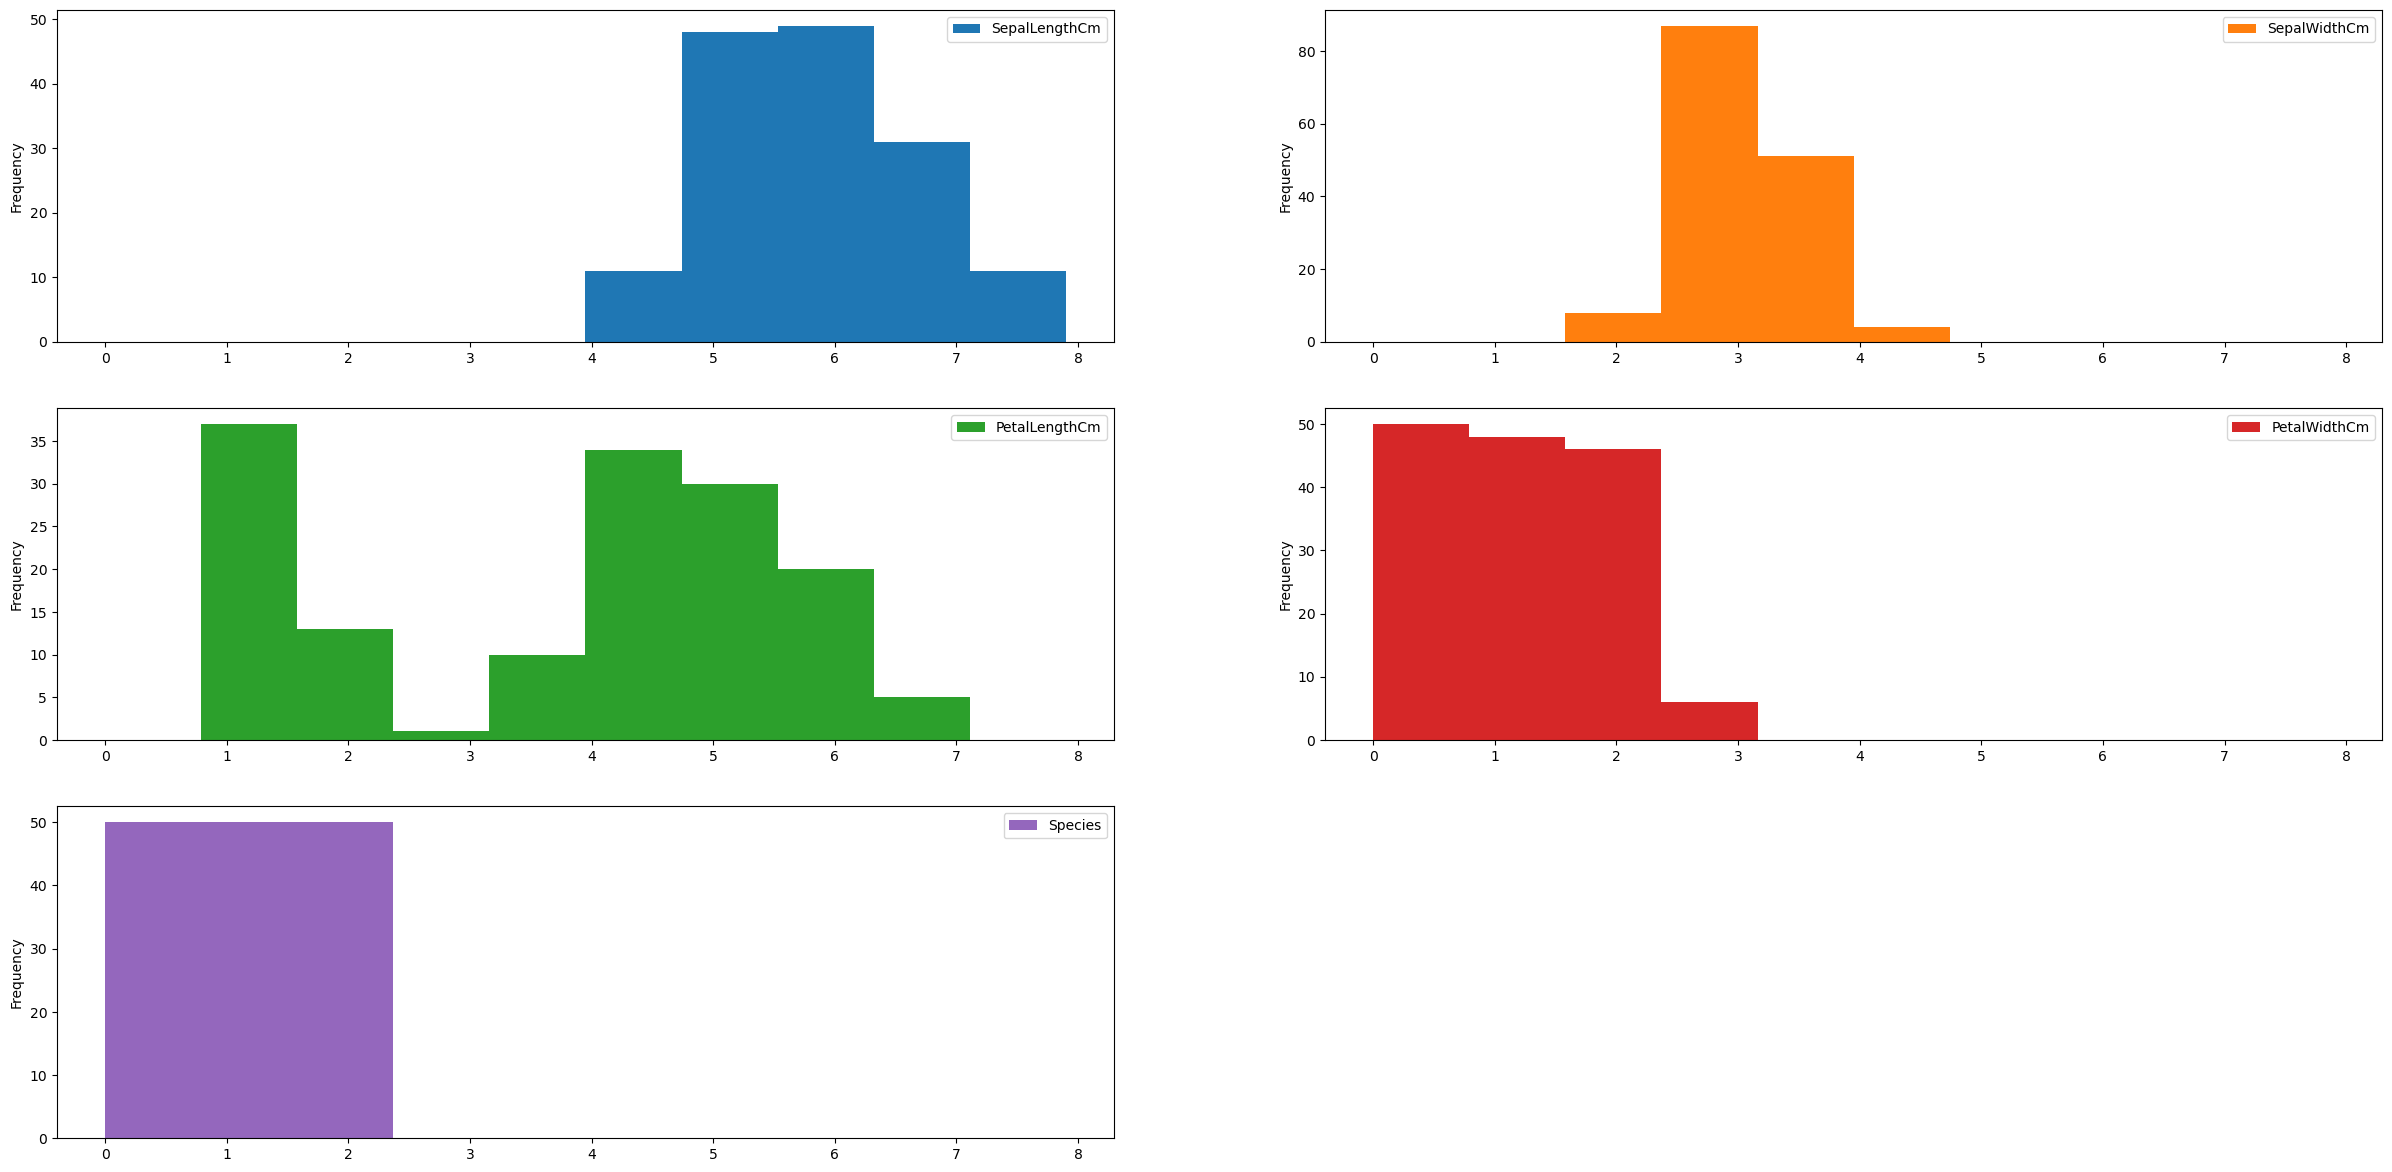

In [127]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

10. Estimate correlation coefficients and represent using heatmaps

In [128]:
c=df.corr()
c

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.460039
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.612165
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.649101
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.580749
Species,0.460039,-0.612165,0.649101,0.580749,1.000000


<Axes: >

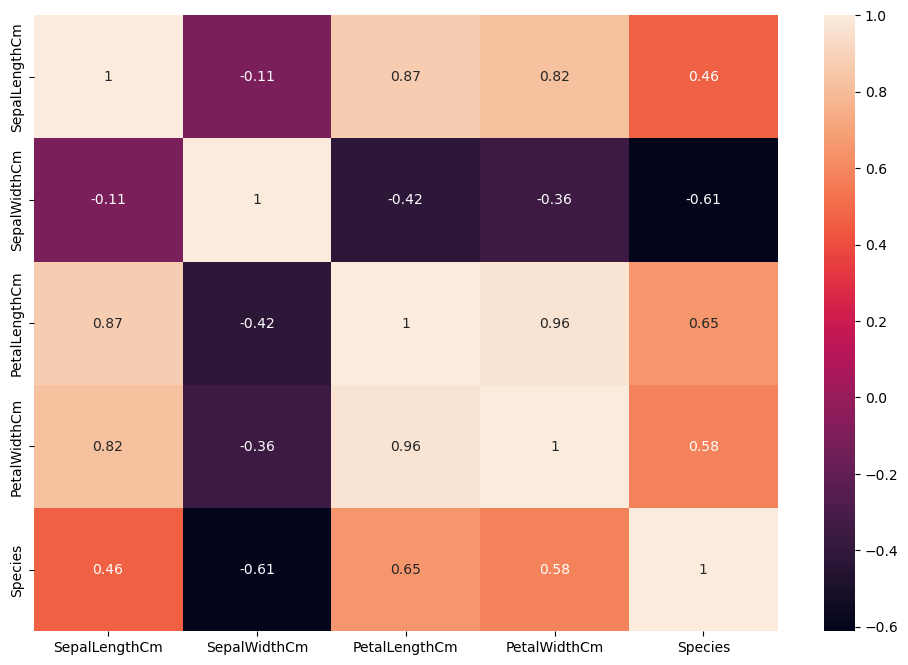

In [129]:
plt.figure(figsize=(12,8))
sns.heatmap(c,annot=True)

11. Declare feature vector and target variable

In [130]:
X = df.drop(['Species'], axis=1)

y = df['Species']

In [131]:
X.shape

(150, 4)

In [132]:
y.shape

(150,)

12. Split data into separate training and test set

In [173]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

13) Perform Feature Scaling(Normalize)

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
s=StandardScaler()
X_TRAIN=s.fit_transform(x_train)
X_TEST=s.fit_transform(x_test)

14. Fit the K Neighbours Classifier to the training set

In [176]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_TRAIN,y_train)

KNeighborsClassifier(n_neighbors=3)

15. Predict test-set results 

In [154]:
y_pred=knn.predict(X_TEST)
y_pred

array([1, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0,
       0])

16. Check the accuracy score 

In [155]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8666666666666667


17. Compare the train-set and test-set accuracy

In [139]:
y_pred_train = knn.predict(X_TRAIN)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.9714


In [140]:
print("test-set accuracy")
print(accuracy_score(y_test,y_pred))

test-set accuracy
0.8666666666666667


18. Rebuild the kNN Classification model using different values of k (3,4,5,6,7,8,9)

In [58]:
for i in range(3,10):
    print("k=",i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_TRAIN,y_train)
    y_pred_train = knn.predict(X_TEST)
    
    print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_train)))


k= 3
Training-set accuracy score: 0.8667
k= 4
Training-set accuracy score: 0.8444
k= 5
Training-set accuracy score: 0.8889
k= 6
Training-set accuracy score: 0.8667
k= 7
Training-set accuracy score: 0.9556
k= 8
Training-set accuracy score: 0.9111
k= 9
Training-set accuracy score: 0.9333


So k=7 is optimum as is has highest accuracy

19. Tabulate the results using the Tabulate package

In [102]:
headers = ["K","TRAIN RATIO","TEST RATIO ","Precision","Recall_score","F1 SCORE","Accuracy"]
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,classification_report
from tabulate import tabulate

In [103]:
data=[]
a=[0.3,0.25,0.2]
for k in range(3,10):
    for i in a:
        
        knn = KNeighborsClassifier(n_neighbors=k)
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=i,random_state=0)
        s=StandardScaler()
        X_TRAIN=s.fit_transform(x_train)
        X_TEST=s.fit_transform(x_test)
        knn.fit(X_TRAIN,y_train)
        y_pred = knn.predict(X_TEST)
        
        p=precision_score(y_test,y_pred,average='macro')
        R=recall_score(y_test,y_pred,average='macro')
        F1=2*p*R/(p+R)
        
        
        acc=accuracy_score(y_test,y_pred)
        data.append([k,1-i,i,F1,p,R,acc])
print(tabulate(data,tablefmt="grid",headers=headers))

+-----+---------------+---------------+-------------+----------------+------------+------------+
|   K |   TRAIN RATIO |   TEST RATIO  |   Precision |   Recall_score |   F1 SCORE |   Accuracy |
+=====+===============+===============+=============+================+============+============+
|   3 |          0.7  |          0.3  |    0.885609 |       0.882353 |   0.888889 |   0.866667 |
+-----+---------------+---------------+-------------+----------------+------------+------------+
|   3 |          0.75 |          0.25 |    0.906949 |       0.897436 |   0.916667 |   0.894737 |
+-----+---------------+---------------+-------------+----------------+------------+------------+
|   3 |          0.8  |          0.2  |    0.881783 |       0.866667 |   0.897436 |   0.866667 |
+-----+---------------+---------------+-------------+----------------+------------+------------+
|   4 |          0.7  |          0.3  |    0.87037  |       0.87037  |   0.87037  |   0.844444 |
+-----+---------------+-------

20)Display confusion matrix

<Axes: >

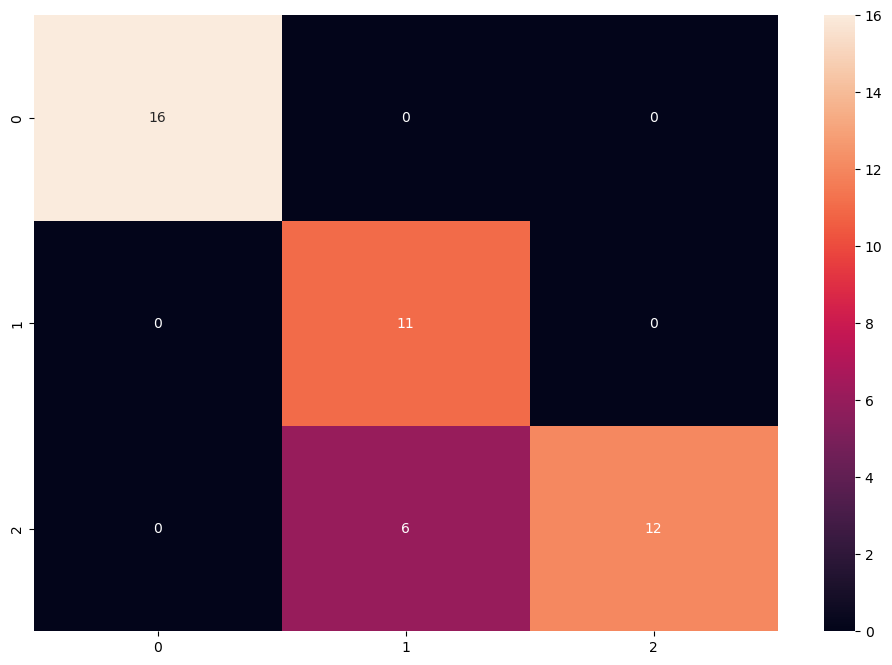

In [88]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)

In [89]:
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,classification_report

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.65      1.00      0.79        11
         2.0       1.00      0.67      0.80        18

    accuracy                           0.87        45
   macro avg       0.88      0.89      0.86        45
weighted avg       0.91      0.87      0.87        45



22)Evaluate classification error

In [157]:
classification_error = 1 - accuracy_score(y_test, y_pred)
print(classification_error)

0.1333333333333333


23)Generate ROC curve and ROC AUC score.

In [159]:
y_prob=knn.predict_proba(X_TEST)
y_prob

array([[0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 1.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.66666667, 0.33333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [1.

In [162]:
y_prob1=y_prob[:,2]

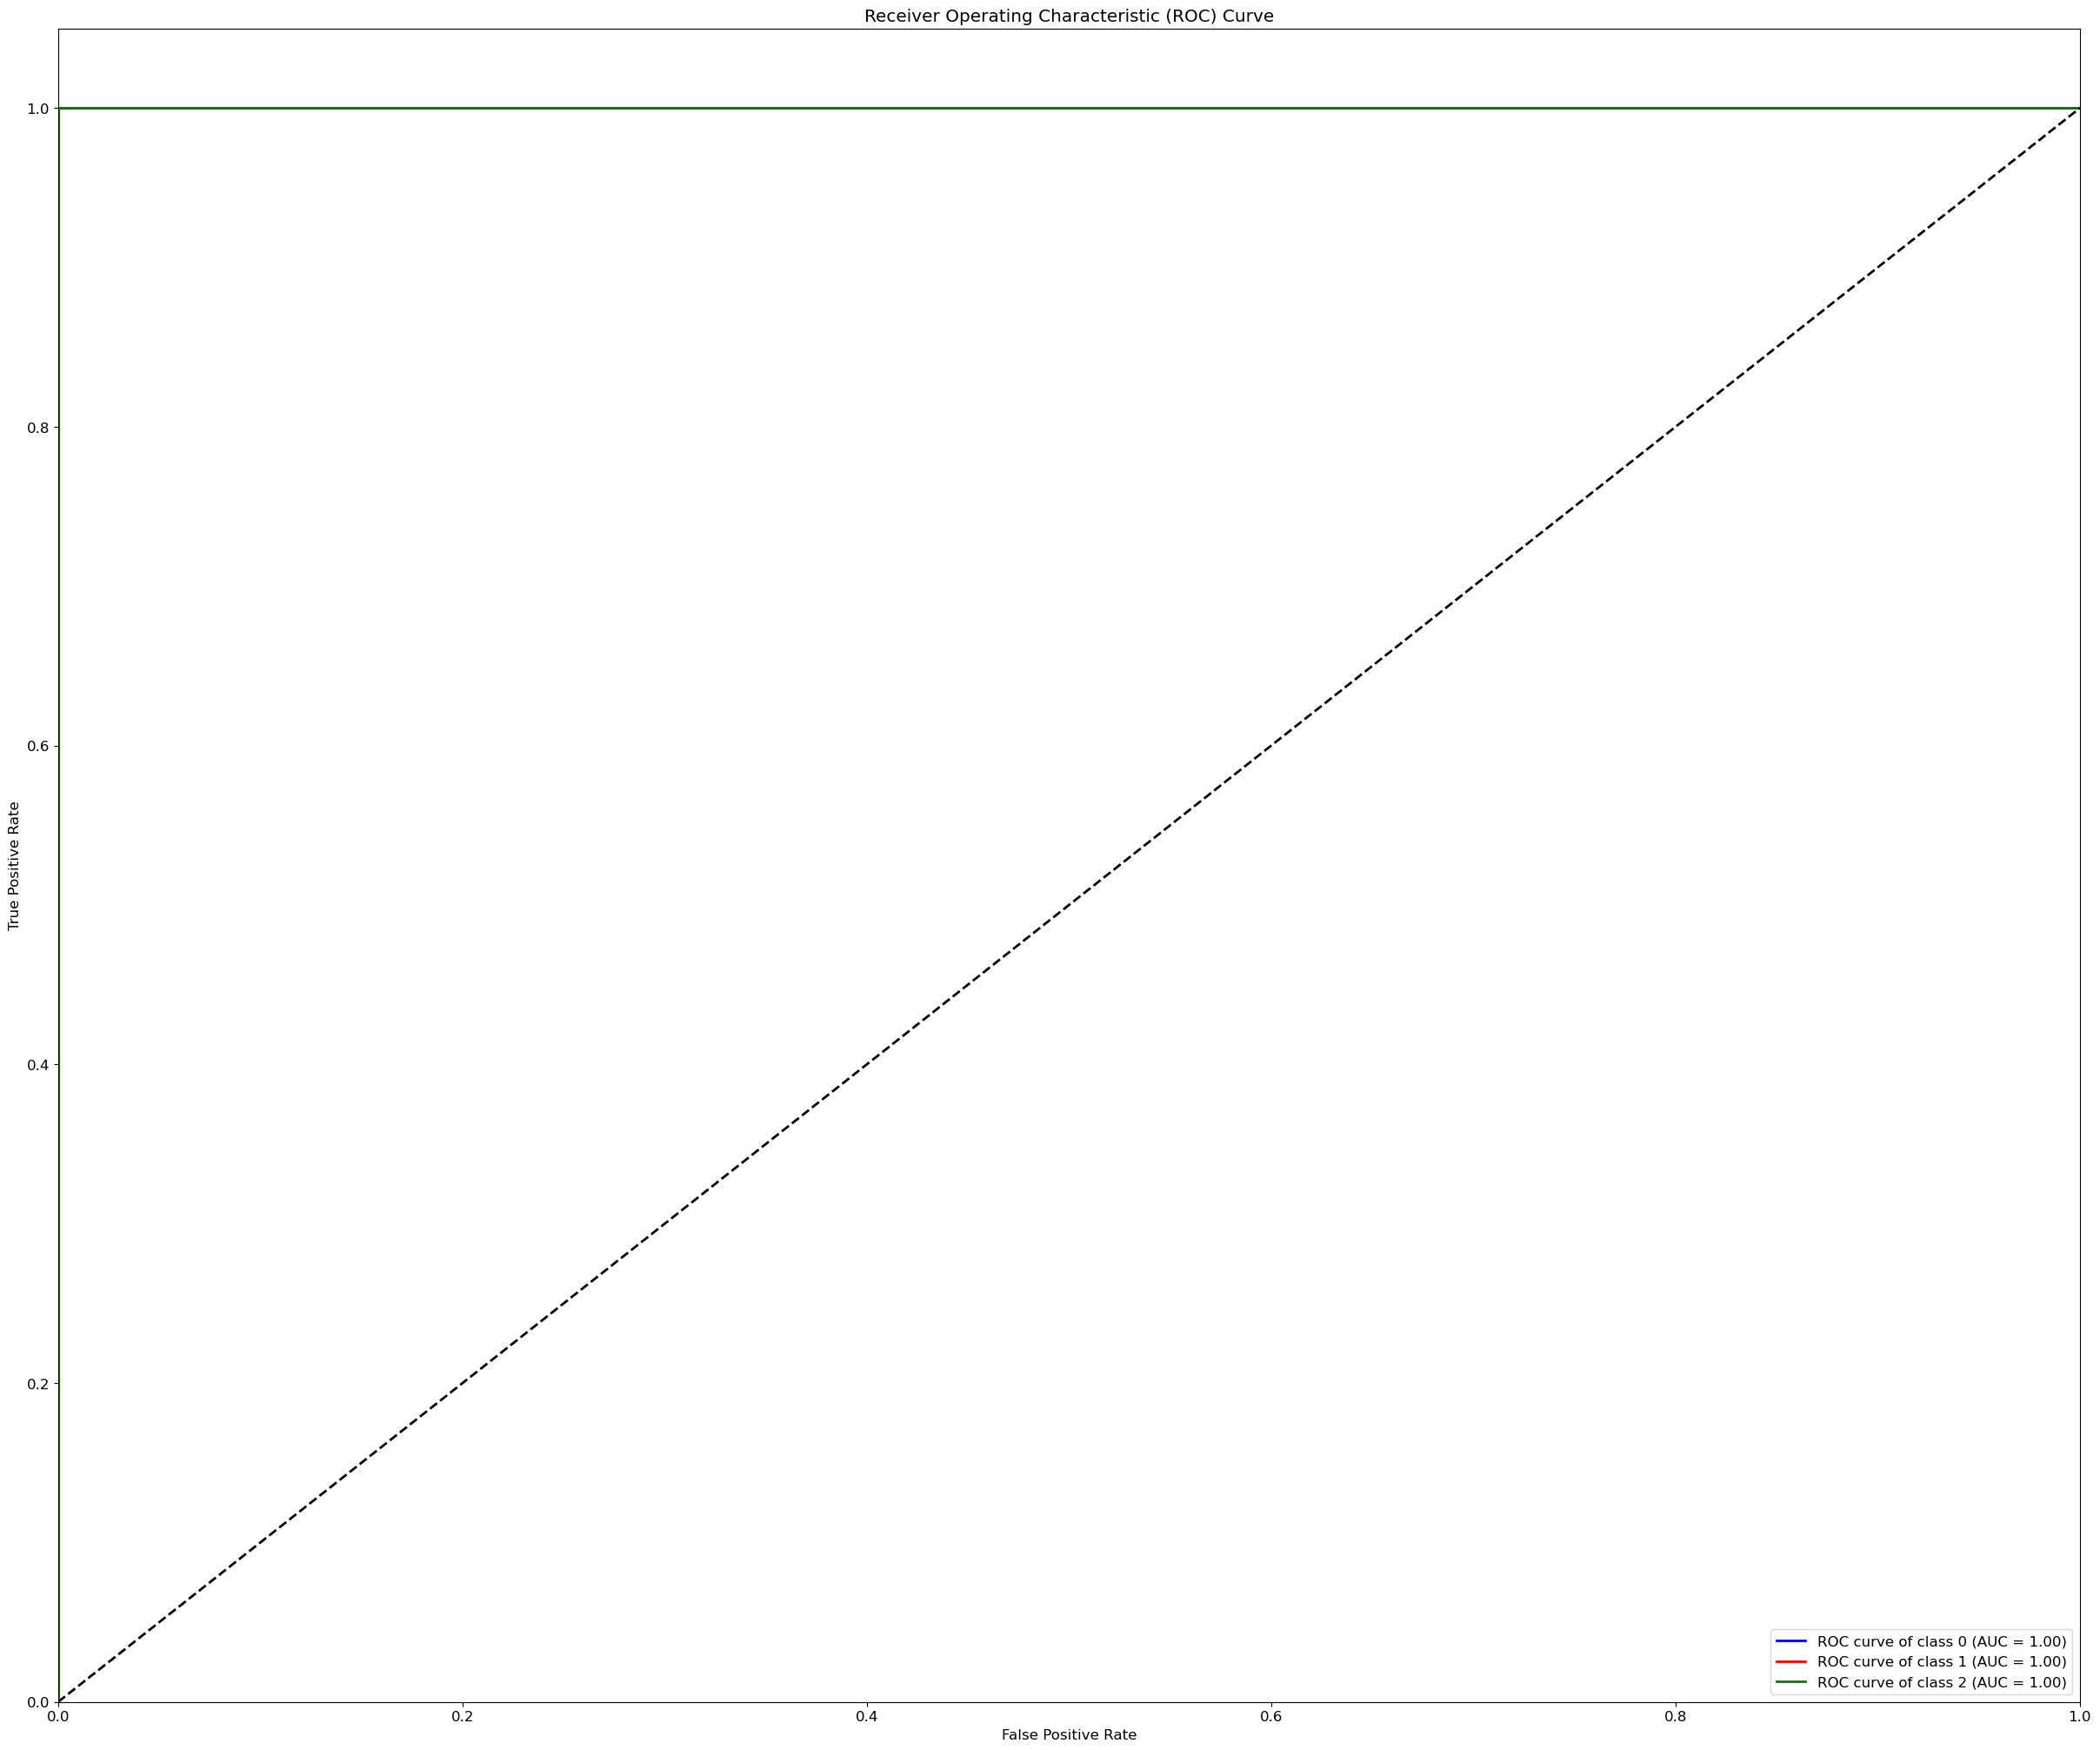

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the k-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Get the predicted probabilities for each class
y_prob = knn.predict_proba(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Three classes in the Iris dataset
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Implementing KNN without using library

24) Perform k-fold validation

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Example: using 5 neighbors

# Assuming X and y are your features and target variable
# Define the number of folds for cross-validation
k_folds = 5

# Perform k-fold cross-validation
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the average cross-validation score
average_cv_score = np.mean(cv_scores)
print("Average cross-validation score:", average_cv_score)


Cross-validation scores: [1.         1.         0.96666667 0.93333333 0.96666667]
Average cross-validation score: 0.9733333333333334


Implementing KNN without using library

In [144]:
X = df.drop(['Species'], axis=1)

y = df['Species']

In [145]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = np.argmax(np.bincount(k_nearest_labels))
        return most_common


# Split your DataFrame into features (X) and target variable (y)
X = df.iloc[:, :-1].values.astype(float)  
y = df.iloc[:, -1].values.astype(int) 
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the KNN classifier
knn = KNN(k=4)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)

# Evaluate the model
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0
